In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Pre-pre processing:
# set up rng
# from frozendict import V
seed = 0
np.random.seed(seed)
num_samples = 500

# # load in baseline health cost with 0 change in generation
# baseline = pd.read_csv("C:\\Users\\elrog\\COBRA\\input files\\new data\\Output_080425_2\\NoChange.csv", nrows = 5)

# y_base = np.zeros((1,2))
# # save minimum and maximum baseline values
# min_base = baseline.at[0,'$ Total Health Benefits(low estimate)'] / 2000
# min_base = min_base.split()[-1]
# max_base = baseline.at[0,'$ Total Health Benefits(high estimate)'] / 2000
# max_base = max_base.split()[-1]

# y_base[0] = [float(min_base),float(max_base)]
# print(y_base)

In [78]:
# next load in health data
num_skipped = 10
num_samples = 500 + 435 - num_skipped
num_samples = 500
y_health = np.zeros((num_samples, 2))
x_emvect = np.zeros((num_samples, 4, 42))

index = 0
# for i in range(num_samples+num_skipped):
for i in range(500):
    # first extract health data from each trial
    # file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\Output_080425_2\\Outcome'+str(i+1)+'.csv')
    if (i==208 or i == 504 or i ==523 or i==534 or i == 736 or i == 758 or i==762 or i==835 or i==860 or i == 897):
        # index -= 1
        continue
    elif (i < 500):
        file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\Output_080625_0\\Outcome'+str(i+1)+'.csv', nrows=5) 
        emissions_file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\EmissionsScenarios\\EmissionsScenariosTest4_seed0\\DataFile'+str(i+1)+'.csv') 
    else:
        file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\Output_080825_1\\Outcome'+str(i+1 - 500)+'.csv', nrows=5)  
        emissions_file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\EmissionsScenarios\\EmissionsScenariosTest5_seed1\\DataFile'+str(i+1 - 500)+'.csv')

    min = file.at[0,'$ Total Health Benefits(low estimate)']
    min = float(min.split()[-1])

    max = file.at[0,'$ Total Health Benefits(high estimate)']
    max = float(max.split()[-1])

    y_health[index] = [float(min),float(max)]    

    # Nox = emissions_file['NOx'].to_numpy()
    # So2 = emissions_file['SO2'].to_numpy()
    x_emvect[index] = [emissions_file['NOx'].to_numpy(),emissions_file['SO2'].to_numpy(),emissions_file['PM25'].to_numpy(),emissions_file['VOC'].to_numpy()]

    index+=1
    # print(index)

# # x_emvect = []
# x_emvect = np.zeros((num_samples, 4, 42))

# # Fill the array
# # for i in range(num_samples):
# #     data_array[i] = np.random.rand(4, 42, 1)

# for i in range(num_samples+435):
#     if(i==208 or i == 504 or i==523 or i==534 or i == 736):
#         continue
#     if (i < num_samples):
#     # now extract emissions vectors
#         file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\EmissionsScenarios\\EmissionsScenariosTest4_seed0\\DataFile'+str(i+1)+'.csv')
#     else:
#         file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\EmissionsScenarios\\EmissionsScenariosTest5_seed1\\DataFile'+str(i+1 - 500)+'.csv')
       
#     # Nox = file['NOx'].to_numpy()
#     # print(Nox)
#     # So2 = file['SO2'].to_numpy()
#     x_emvect[index] = [file['NOx'].to_numpy(),file['SO2'].to_numpy(),file['PM25'].to_numpy(),file['VOC'].to_numpy()]


# # index: [datafile][emission][entry]
# print(x_emvect[1][1][1])
# print(x_emvect.size())
# print(x_emvect)


In [59]:
# print(y_health)
# print(x_emvect[0])
print(y_health[:100,:])

[[-3133883.80137239 -4340313.18969859]
 [-2472180.89727896 -3450128.46111629]
 [-2922919.11874497 -4072784.75141087]
 [-2052001.98683817 -2870257.35172592]
 [-2219777.62189633 -3100478.47464666]
 [-2821330.7936869  -3948388.7839386 ]
 [-2394145.46768977 -3338365.48707125]
 [-2194659.71689777 -3057972.05531716]
 [-3049541.01122952 -4258259.44948969]
 [-3244652.66528283 -4500681.04244808]
 [-2248916.25136242 -3111094.79775275]
 [-2921348.97179552 -4054935.66792467]
 [-2295888.65115139 -3220718.46270377]
 [-2300812.19560354 -3216031.30088285]
 [-2725883.87089799 -3788260.08900686]
 [-2493786.47061554 -3437980.54540629]
 [-2552613.83844498 -3591805.06691475]
 [-2165652.26750413 -3012347.78629609]
 [-2886178.03283503 -4027067.55327004]
 [-2850695.44050938 -3965781.52419657]
 [-3032662.81372489 -4219001.91291302]
 [-2038742.16280147 -2859764.51337174]
 [-2927097.09719986 -4086995.8697546 ]
 [-2358809.05659108 -3307271.69272411]
 [-2484516.55896319 -3469093.97264275]
 [-2959509.21334075 -4124

In [79]:
# split data into 75% training set and 25% testing
# indx = int(0.75*num_samples)
indx = int(0.75*500)
# indx = 95
# print(indx)



x_train = x_emvect[:indx]
x_test = x_emvect[indx:]

print(x_test)

y_train = y_health[:indx,:]
y_test = y_health[indx:,:]

# Steps from ChatGPT
# Flatten Data points to be used in regression:
# Step 1: Flatten each sample (4, 42) → (168,)
X_train = np.array([dp.flatten() for dp in x_train])
X_test = np.array([dp.flatten() for dp in x_test])
# X_train = x_train.reshape(indx, -1)  # Shape becomes (5, 168)
# X_test = x_test.reshape(indx, -1)

# Step 2: Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions (optional)
y_pred = model.predict(X_test)

# print("Coefficients shape:", model.coef_.shape)  # (168,)
# # print("Coefficients: \n", model.coef_)
# print("Mean squared error: %.2f" % mean_squared_error(y_test[:,0], y_pred[:,0]))
# print("Coefficient of determination: %.2f" % r2_score(y_test[:,0], y_pred[:,0]))
# # print("Predictions:", y_pred)

[[[8.75898074e-02 2.25508407e-01 2.27954169e-01 ... 2.68931448e-01
   8.12880669e-02 2.77741814e-02]
  [8.83629835e-04 2.14769912e-03 2.49433133e-03 ... 3.36866115e-03
   1.79311912e-03 6.12665765e-04]
  [0.00000000e+00 1.42975398e-02 1.38573963e-03 ... 1.08673374e-02
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 8.95897346e-03 8.86873363e-04 ... 3.34058897e-03
   0.00000000e+00 0.00000000e+00]]

 [[1.82544368e-01 2.50035241e-01 2.03693702e-01 ... 2.79585798e-01
   6.49612090e-02 1.56206869e-02]
  [1.84155731e-03 2.38128800e-03 2.22886726e-03 ... 3.50211856e-03
   1.43296785e-03 3.44573976e-04]
  [0.00000000e+00 1.58525744e-02 1.23825959e-03 ... 1.12978724e-02
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 9.93337282e-03 7.92486136e-04 ... 3.47293424e-03
   0.00000000e+00 0.00000000e+00]]

 [[1.91856212e-01 2.10071518e-01 4.95638636e-01 ... 1.36586518e-01
   7.19535224e-02 2.19852509e-02]
  [1.93549773e-03 2.00068112e-03 5.42340149e-03 ... 1.71089584e-03
   1.58721005e-03 4.

In [80]:
# print("Coefficients: \n", model.coef_)
# type(model.coef_)
coeffs = pd.DataFrame(model.coef_.transpose(), columns=['Low Estimate', 'High Estimate'])
coeffs2 = pd.DataFrame(model.coef_)

coeffs.to_csv('linrgrTonsCoeffsFINAL',index=False)


# print(coeffs.head())
# print(coeffs2.head())

Coefficients shape: (2, 168)
Mean squared error: 0.07
Coefficient of determination: 1.00
Root mean squared error: 0.27


Text(0, 0.5, 'Predicted Health outcomes ($)')

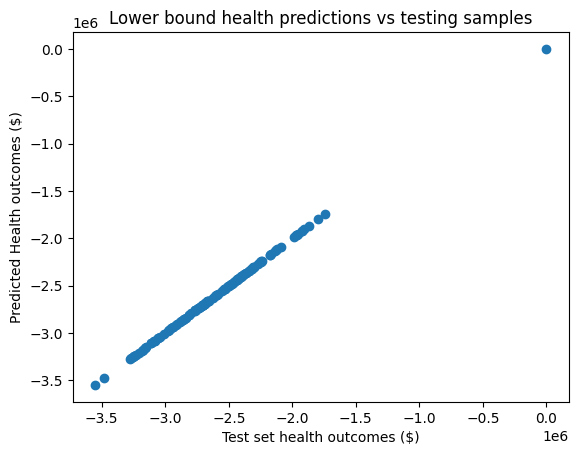

In [81]:
# lower health estimates
print("Coefficients shape:", model.coef_.shape)  # (168,)
# print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test[:,0], y_pred[:,0]))
print("Coefficient of determination: %.2f" % r2_score(y_test[:,0], y_pred[:,0], force_finite = False))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test[:,0], y_pred[:,0]))

# this is the lower health outcomes
plt.scatter(y_test[:,0],y_pred[:,0])
plt.title("Lower bound health predictions vs testing samples")
plt.xlabel("Test set health outcomes ($)")
plt.ylabel("Predicted Health outcomes ($)")

# print("Mean squared error: %.2f" % mean_squared_error(y_test[:,0], y_pred[:,0],multioutput='raw_values'))

Mean squared error: 0.09
Coefficient of determination: 1.00
Root mean squared error: 0.29


Text(0, 0.5, 'Predicted Health outcomes ($)')

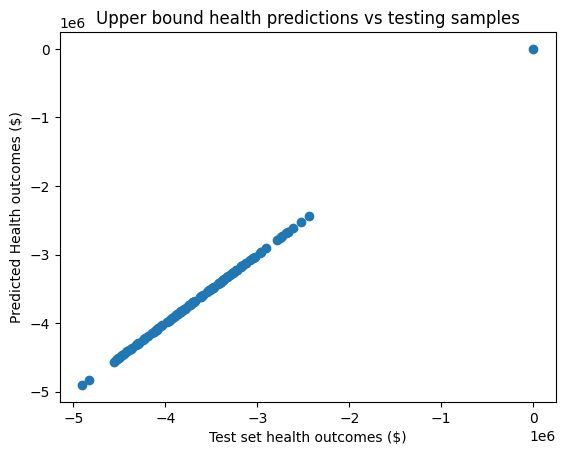

In [82]:
# higher health estimates
# print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test[:,1], y_pred[:,1]))
print("Coefficient of determination: %.2f" % r2_score(y_test[:,1], y_pred[:,1], force_finite = False))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test[:,1], y_pred[:,1]))

# this is the higher estimate health outcomes
plt.scatter(y_test[:,1],y_pred[:,1])
plt.title("Upper bound health predictions vs testing samples")
plt.xlabel("Test set health outcomes ($)")
plt.ylabel("Predicted Health outcomes ($)")
# print("Mean squared error: %.2f" % mean_squared_error(y_test[:,0], y_pred[:,0],multioutput='raw_values'))

In [83]:
# is this the right formulation tho?? 
rel_rootmse_low = root_mean_squared_error(y_test[:,1], y_pred[:,1]) / np.mean(y_test[:,0])
rel_rootmse_high = root_mean_squared_error(y_test[:,1], y_pred[:,1]) / np.mean(y_test[:,0])
print("low rrmse:",rel_rootmse_low)
print("high rrmse:",rel_rootmse_high)




low rrmse: -1.1217341653264477e-07
high rrmse: -1.1217341653264477e-07


[[0.5488135  0.71518937 0.60276338 0.54488318]
 [0.4236548  0.64589411 0.43758721 0.891773  ]
 [0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293 ]
 [0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329 0.94466892]
 [0.52184832 0.41466194 0.26455561 0.77423369]
 [0.45615033 0.56843395 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547]
 [0.66676672 0.67063787 0.21038256 0.1289263 ]
 [0.31542835 0.36371077 0.57019677 0.43860151]
 [0.98837384 0.10204481 0.20887676 0.16130952]
 [0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295]
 [0.19658236 0.36872517 0.82099323 0.09710128]
 [0.83794491 0.09609841 0.97645947 0.4686512 ]
 [0.97676109 0.60484552 0.73926358 0.03918779]
 [0.28280696 0.12019656 0.2961402  0.11872772]
 [0.31798318 0.41426299 0.0641475  0.69247212]
 [0.56660145 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# next load in health data
num_skipped = 10
num_samples = 500 + 435 - num_skipped
num_samples = 500
y_health = np.zeros((num_samples, 2))
x_emvect = np.zeros((num_samples, 4, 42))

index = 0
# for i in range(num_samples+num_skipped):
for i in range(500):
    # first extract health data from each trial
    # file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\Output_080425_2\\Outcome'+str(i+1)+'.csv')
    if (i < 500):
        file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\Output_080625_0\\Outcome'+str(i+1)+'.csv', nrows=5) 
        emissions_file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\EmissionsScenarios\\EmissionsScenariosTest4_seed0\\DataFile'+str(i+1)+'.csv') 
    else:
        file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\Output_080825_1\\Outcome'+str(i+1 - 500)+'.csv', nrows=5)  
        emissions_file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\EmissionsScenarios\\EmissionsScenariosTest5_seed1\\DataFile'+str(i+1 - 500)+'.csv')

    min = file.at[0,'$ Total Health Benefits(low estimate)']
    min = float(min.split()[-1])

    max = file.at[0,'$ Total Health Benefits(high estimate)']
    max = float(max.split()[-1])

    y_health[index] = [float(min),float(max)]    

    # Nox = emissions_file['NOx'].to_numpy()
    # So2 = emissions_file['SO2'].to_numpy()
    x_emvect[index] = [emissions_file['NOx'].to_numpy(),emissions_file['SO2'].to_numpy(),emissions_file['PM25'].to_numpy(),emissions_file['VOC'].to_numpy()]

    index+=1
    # print(index)

[[[3.35711900e+02 4.30572814e+02 9.28484977e+02 ... 7.77426642e+02
   1.58219756e+02 3.81019750e+01]
  [3.38675308e+00 4.10069346e+00 1.01597140e+01 ... 9.73812078e+00
   3.49014168e+00 8.40484743e-01]
  [0.00000000e+00 2.72989022e+01 5.64428558e+00 ... 3.14152831e+01
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.71057499e+01 3.61234277e+00 ... 9.65696977e+00
   0.00000000e+00 0.00000000e+00]]

 [[1.96661824e+02 2.66357348e+02 3.56883608e+02 ... 7.20809698e+02
   6.10029003e+01 6.99556347e+01]
  [1.98397805e+00 2.53673665e+00 3.90510939e+00 ... 9.02893150e+00
   1.34565221e+00 1.54313900e+00]
  [0.00000000e+00 1.68874183e+01 2.16950522e+00 ... 2.91274308e+01
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.05818157e+01 1.38848334e+00 ... 8.95369041e+00
   0.00000000e+00 0.00000000e+00]]

 [[5.32027736e+01 3.16202386e+02 7.66229046e+02 ... 5.05435691e+02
   1.70192597e+02 6.53501035e+01]
  [5.36724072e-01 3.01145129e+00 8.38426919e+00 ... 6.33113601e+00
   3.75424847e+00 1.

In [88]:
# redo with original emissions vals as a sanity check
num_samples = 346
y_health = np.zeros((num_samples, 2))
x_emvect = np.zeros((num_samples, 4, 42))

# for i in range(num_samples+num_skipped):
for i in range(num_samples):
    # first extract health data from each trial
    # file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\Output_080425_2\\Outcome'+str(i+1)+'.csv')
    file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\Output_080425_5\\Outcome'+str(i+1)+'.csv', nrows=5) 
    emissions_file = pd.read_csv('C:\\Users\\elrog\\COBRA\\input files\\new data\\EmissionsScenarios\\EmissionsScenariosTest4_seed0\\DataFile'+str(i+1)+'.csv') 

    min = file.at[0,'$ Total Health Benefits(low estimate)']
    min = float(min.split()[-1]) / 2000

    max = file.at[0,'$ Total Health Benefits(high estimate)']
    max = float(max.split()[-1]) / 2000

    y_health[i] = [float(min),float(max)]   


    data_file = pd.read_csv("C:\\Users\\elrog\\COBRA\\input files\\new data\\EmissionsScenarios\\EmissionsScenariosTest2_seed5\\DataFile"+str(i+1)+".csv")
    target_file = pd.read_csv("C:\\Users\\elrog\\COBRA\\input files\\new data\\BatchFileCreationCommands\\GenericBatchFileALL.csv")


    Nox = data_file['NOx'] / 2000.0
    So2 = data_file['SO2'] / 2000.0
    pm25= data_file['PM25']/ 2000.0
    voc = data_file['VOC'] / 2000.0 

    # Nox = emissions_file['NOx'].to_numpy()
    # So2 = emissions_file['SO2'].to_numpy()
    x_emvect[i] = [Nox,So2,pm25,voc]

    if (i % 50 == 0):
        print(i)


0
50
100
150
200
250
300


In [89]:
# split data into 75% training set and 25% testing
# indx = int(0.75*num_samples)
indx = int(0.75*346)
# indx = 95
# print(indx)



x_train = x_emvect[:indx]
x_test = x_emvect[indx:]

print(x_test)

y_train = y_health[:indx,:]
y_test = y_health[indx:,:]

# Steps from ChatGPT
# Flatten Data points to be used in regression:
# Step 1: Flatten each sample (4, 42) → (168,)
X_train = np.array([dp.flatten() for dp in x_train])
X_test = np.array([dp.flatten() for dp in x_test])
# X_train = x_train.reshape(indx, -1)  # Shape becomes (5, 168)
# X_test = x_test.reshape(indx, -1)

# Step 2: Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions (optional)
y_pred = model.predict(X_test)

[[[1.53230220e-01 1.33439377e-01 2.83902775e-01 ... 3.34664051e-01
   3.89652322e-02 1.98736665e-02]
  [1.54582820e-03 1.27085121e-03 3.10653493e-03 ... 4.19203404e-03
   8.59527182e-04 4.38389703e-04]
  [0.00000000e+00 8.46023808e-03 1.72585274e-03 ... 1.35235472e-02
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 5.30126506e-03 1.10454575e-03 ... 4.15710043e-03
   0.00000000e+00 0.00000000e+00]]

 [[1.35494019e-01 1.18700564e-01 1.89199840e-01 ... 2.76165066e-01
   3.21984412e-02 1.78839773e-02]
  [1.36690057e-03 1.13048156e-03 2.07027181e-03 ... 3.45927014e-03
   7.10259733e-04 3.94499500e-04]
  [0.00000000e+00 7.52577725e-03 1.15015100e-03 ... 1.11596430e-02
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 4.71572308e-03 7.36096643e-04 ... 3.43044289e-03
   0.00000000e+00 0.00000000e+00]]

 [[7.08563878e-02 1.27036186e-01 2.39231314e-01 ... 2.52780837e-01
   7.91611498e-02 2.51707299e-02]
  [7.14818540e-04 1.20986844e-03 2.61772866e-03 ... 3.16635704e-03
   1.74620183e-03 5.

Coefficients shape: (2, 168)
Mean squared error: 34758.31
Coefficient of determination: 1.00
Root mean squared error: 186.44


Text(0, 0.5, 'Predicted Health outcomes ($)')

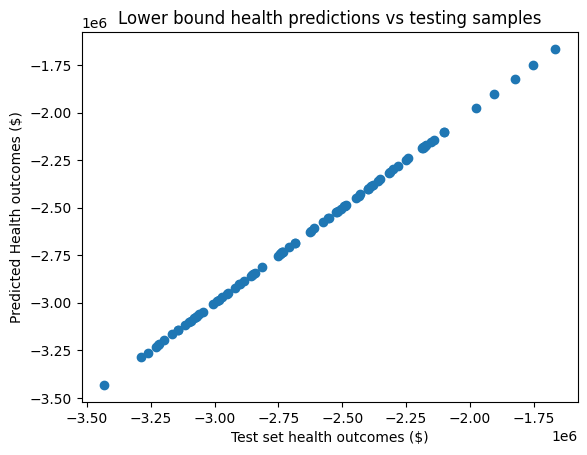

In [90]:
# lower health estimates
print("Coefficients shape:", model.coef_.shape)  # (168,)
# print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test[:,0], y_pred[:,0]))
print("Coefficient of determination: %.2f" % r2_score(y_test[:,0], y_pred[:,0], force_finite = False))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test[:,0], y_pred[:,0]))

# this is the lower health outcomes
plt.scatter(y_test[:,0],y_pred[:,0])
plt.title("Lower bound health predictions vs testing samples")
plt.xlabel("Test set health outcomes ($)")
plt.ylabel("Predicted Health outcomes ($)")

In [91]:
coeffs = pd.DataFrame(model.coef_.transpose(), columns=['Low Estimate', 'High Estimate'])
# coeffs2 = pd.DataFrame(model.coef_)

coeffs.to_csv('linrgrConvertedDataCoeffs',index=False)